In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\data\Task2\Sample - Superstore.csv", encoding='latin1')


In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
# Convert date columns
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Sales/Profit Over Time

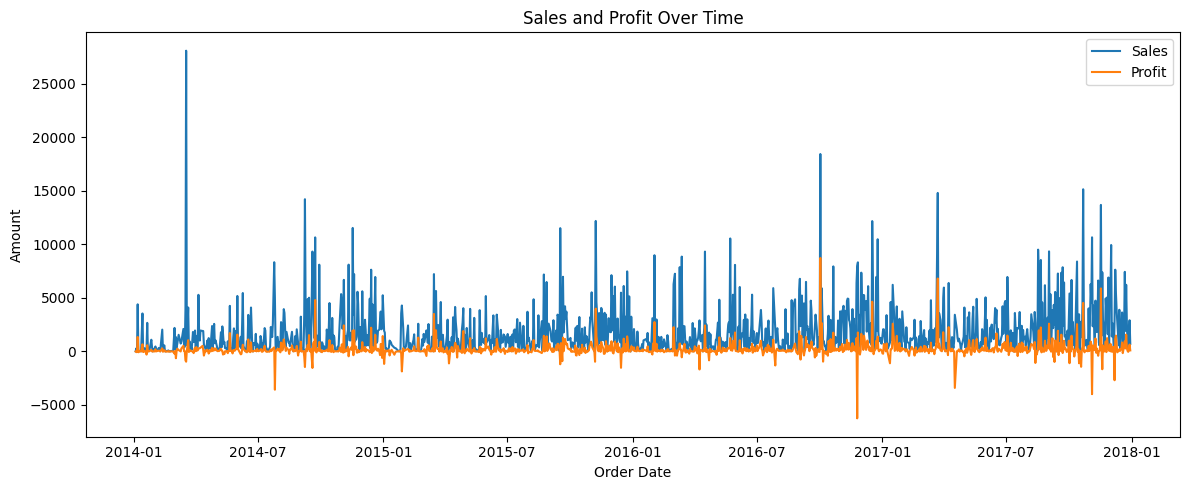


**Summary & Business Insights:**  
The line chart depicting Sales and Profit over time (2014–2017) reveals several critical business insights.  
**Sales demonstrate high volatility with noticeable spikes**, especially in mid-2014 and 2016, suggesting bulk purchases or seasonal promotions.  
**Despite high sales, profit remains relatively low and volatile**, with **multiple dips into negative territory**, highlighting potential issues with discounting, cost management, or product pricing.  
**There is a weak correlation between sales and profit**, indicating that increased revenue is not consistently leading to increased profitability.  
**Year-end sales peaks suggest seasonal buying behavior**, potentially during festive periods or clearance events.  
These results emphasize the importance of **refining promotional strategies**, **enhancing cost control**, and **focusing on high-margin products or customer segments** to drive sustainable profit growth alongside revenue.


In [6]:
df_daily = df.groupby('Order Date')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(12, 5))
plt.plot(df_daily['Order Date'], df_daily['Sales'], label='Sales')
plt.plot(df_daily['Order Date'], df_daily['Profit'], label='Profit')
plt.title("Sales and Profit Over Time")
plt.xlabel("Order Date")
plt.ylabel("Amount")
plt.legend()
plt.tight_layout()
plt.show()


from IPython.display import Markdown, display
summary = """
**Summary & Business Insights:**  
The line chart depicting Sales and Profit over time (2014–2017) reveals several critical business insights.  
**Sales demonstrate high volatility with noticeable spikes**, especially in mid-2014 and 2016, suggesting bulk purchases or seasonal promotions.  
**Despite high sales, profit remains relatively low and volatile**, with **multiple dips into negative territory**, highlighting potential issues with discounting, cost management, or product pricing.  
**There is a weak correlation between sales and profit**, indicating that increased revenue is not consistently leading to increased profitability.  
**Year-end sales peaks suggest seasonal buying behavior**, potentially during festive periods or clearance events.  
These results emphasize the importance of **refining promotional strategies**, **enhancing cost control**, and **focusing on high-margin products or customer segments** to drive sustainable profit growth alongside revenue.
"""

display(Markdown(summary))

# Sales by Category / Sub-Category (Bar Chart)

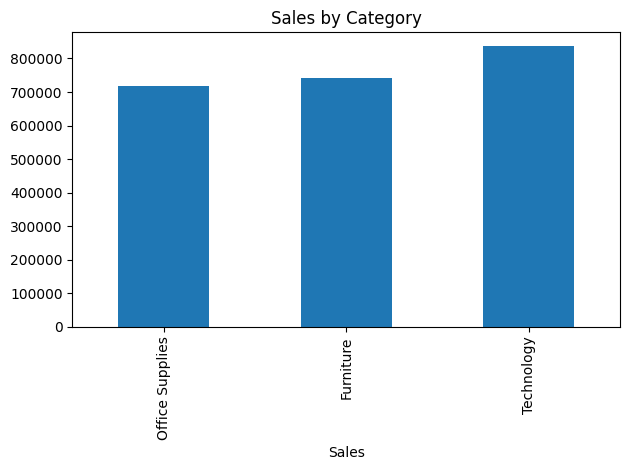


**Summary & Business Insights:**  
The bar chart depicting **Sales by Category** highlights key performance differences across product segments:

- **Technology** leads in total sales, significantly outperforming other categories, indicating strong demand and possibly higher-value items or successful marketing strategies in this segment.  
- **Furniture** and **Office Supplies** follow closely in terms of sales volume, but lag behind Technology, suggesting either lower unit prices or lesser consumer interest.  
- Despite Office Supplies having the lowest sales, the margin between it and Furniture is minimal — potentially a sign that small adjustments in pricing or promotional efforts could boost its performance.  
- These trends suggest that while all categories are performing fairly well, **Technology is the primary revenue driver** and should be a focus for further growth through cross-selling, bundling, or innovation.  
- For **Furniture and Office Supplies**, strategies like **targeted discounts, bundled deals, or optimizing supply chain costs** could help improve both competitiveness and profitability.


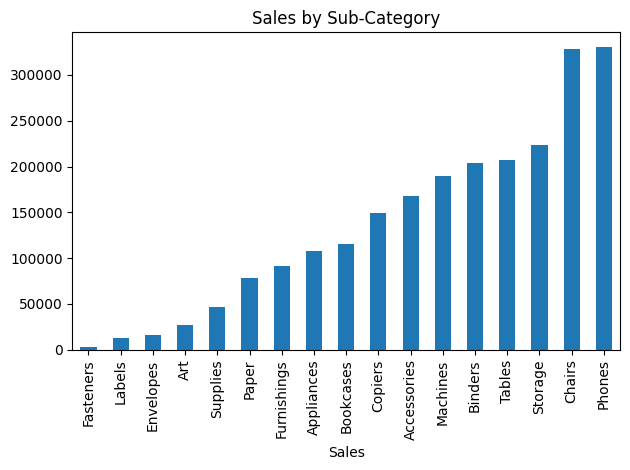


**Sales by Sub-Category – Summary & Business Insights:**  
This bar chart shows a clear disparity in sales performance across different sub-categories:

- **Top Performers:**  
  - **Phones** and **Chairs** are the **leading sub-categories**, each generating over $300,000 in sales.  
    - *Phones* likely represent high-value transactions or consistent B2B demand.  
    - *Chairs* suggest strong demand in the **furniture market**, potentially due to office expansions or ergonomic trends.

- **Mid-tier Performers:**  
  - **Storage, Tables, Binders, and Machines** show solid sales performance, indicating steady customer demand.  
  - These sub-categories may benefit from **bundling or targeted promotions** to push them into the top-performing bracket.

- **Low Performers:**  
  - **Fasteners, Labels, Envelopes, and Art** represent the lowest sales figures.  
    - This may be due to lower unit prices, reduced relevance in a digital workplace, or limited marketing focus.
    - These could be deprioritized unless they offer **high profit margins** or strategic value (e.g., part of bundles).

**Strategic Recommendations:**
- Double down on Phones and Chairs: premium offerings, volume deals, and upselling.
- Focus on profit-maximizing mid-tier sub-categories.
- Reassess viability or bundling strategy for lowest performers.


In [7]:
# By Category
df.groupby('Category')['Sales'].sum().sort_values().plot(kind='bar', title='Sales by Category')
plt.xlabel("Sales")
plt.tight_layout()
plt.show()

from IPython.display import Markdown, display

summary = """
**Summary & Business Insights:**  
The bar chart depicting **Sales by Category** highlights key performance differences across product segments:

- **Technology** leads in total sales, significantly outperforming other categories, indicating strong demand and possibly higher-value items or successful marketing strategies in this segment.  
- **Furniture** and **Office Supplies** follow closely in terms of sales volume, but lag behind Technology, suggesting either lower unit prices or lesser consumer interest.  
- Despite Office Supplies having the lowest sales, the margin between it and Furniture is minimal — potentially a sign that small adjustments in pricing or promotional efforts could boost its performance.  
- These trends suggest that while all categories are performing fairly well, **Technology is the primary revenue driver** and should be a focus for further growth through cross-selling, bundling, or innovation.  
- For **Furniture and Office Supplies**, strategies like **targeted discounts, bundled deals, or optimizing supply chain costs** could help improve both competitiveness and profitability.
"""

display(Markdown(summary))


# By Sub-Category
df.groupby('Sub-Category')['Sales'].sum().sort_values().plot(kind='bar', title='Sales by Sub-Category')
plt.xlabel("Sales")
plt.tight_layout()
plt.show()

from IPython.display import Markdown, display

subcat_summary = """
**Sales by Sub-Category – Summary & Business Insights:**  
This bar chart shows a clear disparity in sales performance across different sub-categories:

- **Top Performers:**  
  - **Phones** and **Chairs** are the **leading sub-categories**, each generating over $300,000 in sales.  
    - *Phones* likely represent high-value transactions or consistent B2B demand.  
    - *Chairs* suggest strong demand in the **furniture market**, potentially due to office expansions or ergonomic trends.

- **Mid-tier Performers:**  
  - **Storage, Tables, Binders, and Machines** show solid sales performance, indicating steady customer demand.  
  - These sub-categories may benefit from **bundling or targeted promotions** to push them into the top-performing bracket.

- **Low Performers:**  
  - **Fasteners, Labels, Envelopes, and Art** represent the lowest sales figures.  
    - This may be due to lower unit prices, reduced relevance in a digital workplace, or limited marketing focus.
    - These could be deprioritized unless they offer **high profit margins** or strategic value (e.g., part of bundles).

**Strategic Recommendations:**
- Double down on Phones and Chairs: premium offerings, volume deals, and upselling.
- Focus on profit-maximizing mid-tier sub-categories.
- Reassess viability or bundling strategy for lowest performers.
"""

display(Markdown(subcat_summary))



# Profit vs Sales by Sub-Category (Scatter Plot)

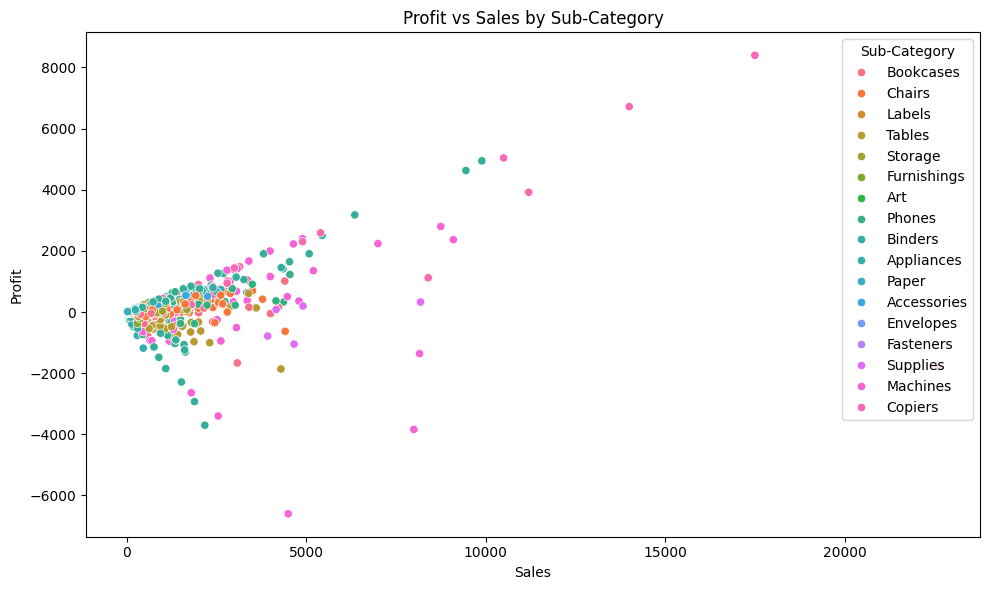


**Summary & Key Insights:**  
The scatter plot reveals crucial insights into the relationship between sales and profit across different sub-categories. Notably, **Copiers and Machines** sub-categories exhibit **exceptionally high sales and profits**, standing out as top-performing areas. Conversely, **Tables** and **Bookcases** frequently show **high sales but consistent losses**, indicating inefficiency or pricing issues. The **Binders** and **Phones** sub-categories also demonstrate strong positive profit trends with increasing sales, suggesting a scalable model. Meanwhile, **Supplies** and **Fasteners** generate lower profits regardless of sales, pointing toward low-margin products. This visualization highlights the need to **strategically focus on high-margin sub-categories** while reassessing the pricing or cost structure of those consistently operating at a loss.


In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Sub-Category')
plt.title("Profit vs Sales by Sub-Category")
plt.tight_layout()
plt.show()

from IPython.display import Markdown, display

summary = """
**Summary & Key Insights:**  
The scatter plot reveals crucial insights into the relationship between sales and profit across different sub-categories. Notably, **Copiers and Machines** sub-categories exhibit **exceptionally high sales and profits**, standing out as top-performing areas. Conversely, **Tables** and **Bookcases** frequently show **high sales but consistent losses**, indicating inefficiency or pricing issues. The **Binders** and **Phones** sub-categories also demonstrate strong positive profit trends with increasing sales, suggesting a scalable model. Meanwhile, **Supplies** and **Fasteners** generate lower profits regardless of sales, pointing toward low-margin products. This visualization highlights the need to **strategically focus on high-margin sub-categories** while reassessing the pricing or cost structure of those consistently operating at a loss.
"""

display(Markdown(summary))



# Top 10 Selling Products 

C:\Users\FAUZAN\AppData\Local\Temp\ipykernel_9176\3255831039.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


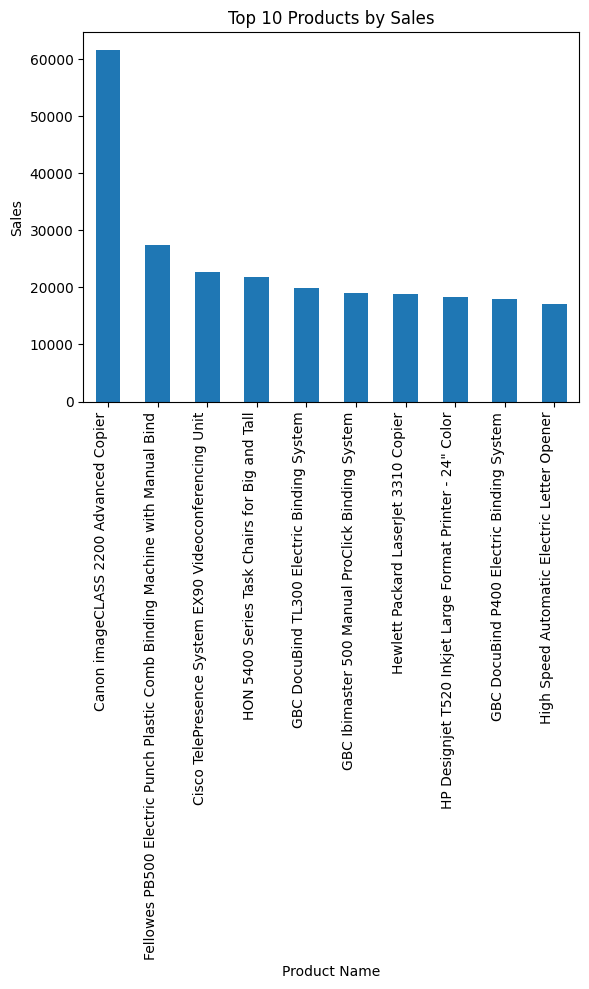


## Summary & Business Insights:

- **Canon imageCLASS 2200 Advanced Copier** is the top-selling product with over **60,000** in sales, indicating strong demand for high-performance office equipment.
- **Binding machines** like the *Fellowes PB500* and *GBC DocuBind* series appear multiple times in the top 10, suggesting consistent demand in the document processing segment.
- **Cisco TelePresence EX90** ranks third, revealing a significant investment in video conferencing tools, likely driven by remote or hybrid work trends.
- **Office furniture and accessories** such as *HON 5400 Series Chairs* and *Electric Letter Opener* also contribute notable sales, pointing to a balanced need for physical workspace improvements.
- Overall, the chart reflects a diverse mix of high-value equipment sales across categories like **copiers, binding systems, conferencing, and office furniture**, which can guide inventory planning and marketing focus.

💡 **Business Suggestion:** Focus marketing and bundling strategies around top-performing categories like **copiers and binding machines**, while also tapping into rising digital trends like **video conferencing solutions**.


In [9]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='bar', title='Top 10 Products by Sales')
plt.ylabel("Sales")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

from IPython.display import display, Markdown

summary_text = """
## Summary & Business Insights:

- **Canon imageCLASS 2200 Advanced Copier** is the top-selling product with over **60,000** in sales, indicating strong demand for high-performance office equipment.
- **Binding machines** like the *Fellowes PB500* and *GBC DocuBind* series appear multiple times in the top 10, suggesting consistent demand in the document processing segment.
- **Cisco TelePresence EX90** ranks third, revealing a significant investment in video conferencing tools, likely driven by remote or hybrid work trends.
- **Office furniture and accessories** such as *HON 5400 Series Chairs* and *Electric Letter Opener* also contribute notable sales, pointing to a balanced need for physical workspace improvements.
- Overall, the chart reflects a diverse mix of high-value equipment sales across categories like **copiers, binding systems, conferencing, and office furniture**, which can guide inventory planning and marketing focus.

💡 **Business Suggestion:** Focus marketing and bundling strategies around top-performing categories like **copiers and binding machines**, while also tapping into rising digital trends like **video conferencing solutions**.
"""

display(Markdown(summary_text))


# Discount Impact on Profit 

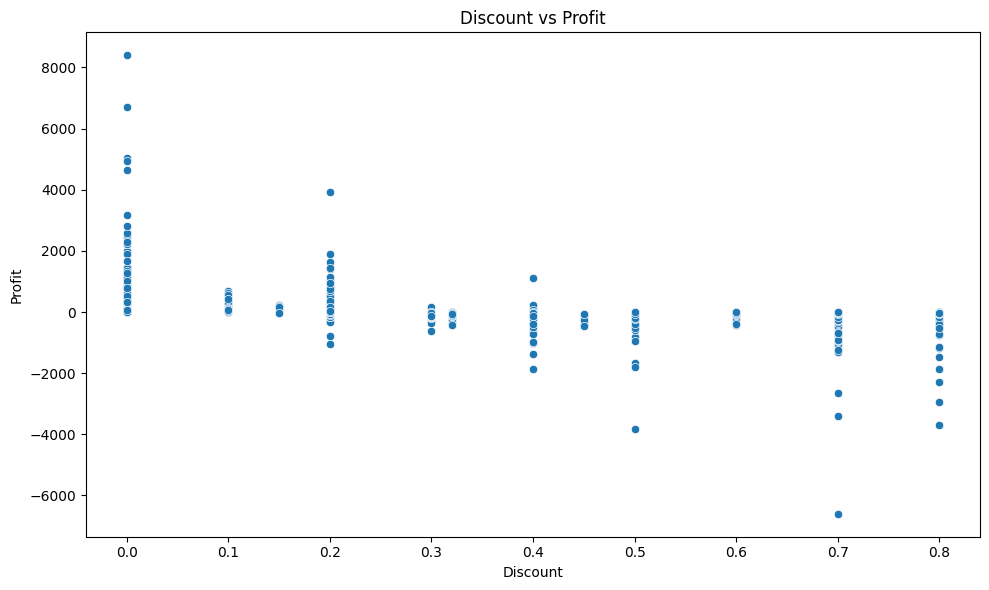


###  Summary & Business Insights: Discount vs Profit

- The scatter plot clearly shows that **higher discounts are often associated with negative profits**, suggesting that excessive discounting may be harming the business rather than boosting sales.
- **Zero or low discounts (0%–10%)** are more frequently associated with **positive profits**, indicating better margins when no or minimal discounts are applied.
- Discounts in the range of **30% and above** mostly result in **losses**, with several transactions showing significant negative profit values.
- This insight implies that the **company should reconsider its discounting strategy**, as aggressive discounting does not necessarily lead to profitability and may erode margins.

🔍 **Business Recommendation:**
- Reevaluate the pricing and discount policies to strike a balance between sales volume and profitability.
- Use data-driven insights to **target discounts more strategically**, such as offering them only on overstock or underperforming items.
- Consider conducting A/B tests on different discount levels to **optimize profitability while maintaining competitiveness**.


In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title("Discount vs Profit")
plt.tight_layout()
plt.show()

from IPython.display import Image, display, Markdown
summary = """
###  Summary & Business Insights: Discount vs Profit

- The scatter plot clearly shows that **higher discounts are often associated with negative profits**, suggesting that excessive discounting may be harming the business rather than boosting sales.
- **Zero or low discounts (0%–10%)** are more frequently associated with **positive profits**, indicating better margins when no or minimal discounts are applied.
- Discounts in the range of **30% and above** mostly result in **losses**, with several transactions showing significant negative profit values.
- This insight implies that the **company should reconsider its discounting strategy**, as aggressive discounting does not necessarily lead to profitability and may erode margins.

🔍 **Business Recommendation:**
- Reevaluate the pricing and discount policies to strike a balance between sales volume and profitability.
- Use data-driven insights to **target discounts more strategically**, such as offering them only on overstock or underperforming items.
- Consider conducting A/B tests on different discount levels to **optimize profitability while maintaining competitiveness**.
"""

display(Markdown(summary))


# Sales by Region / State (Bar Chart)

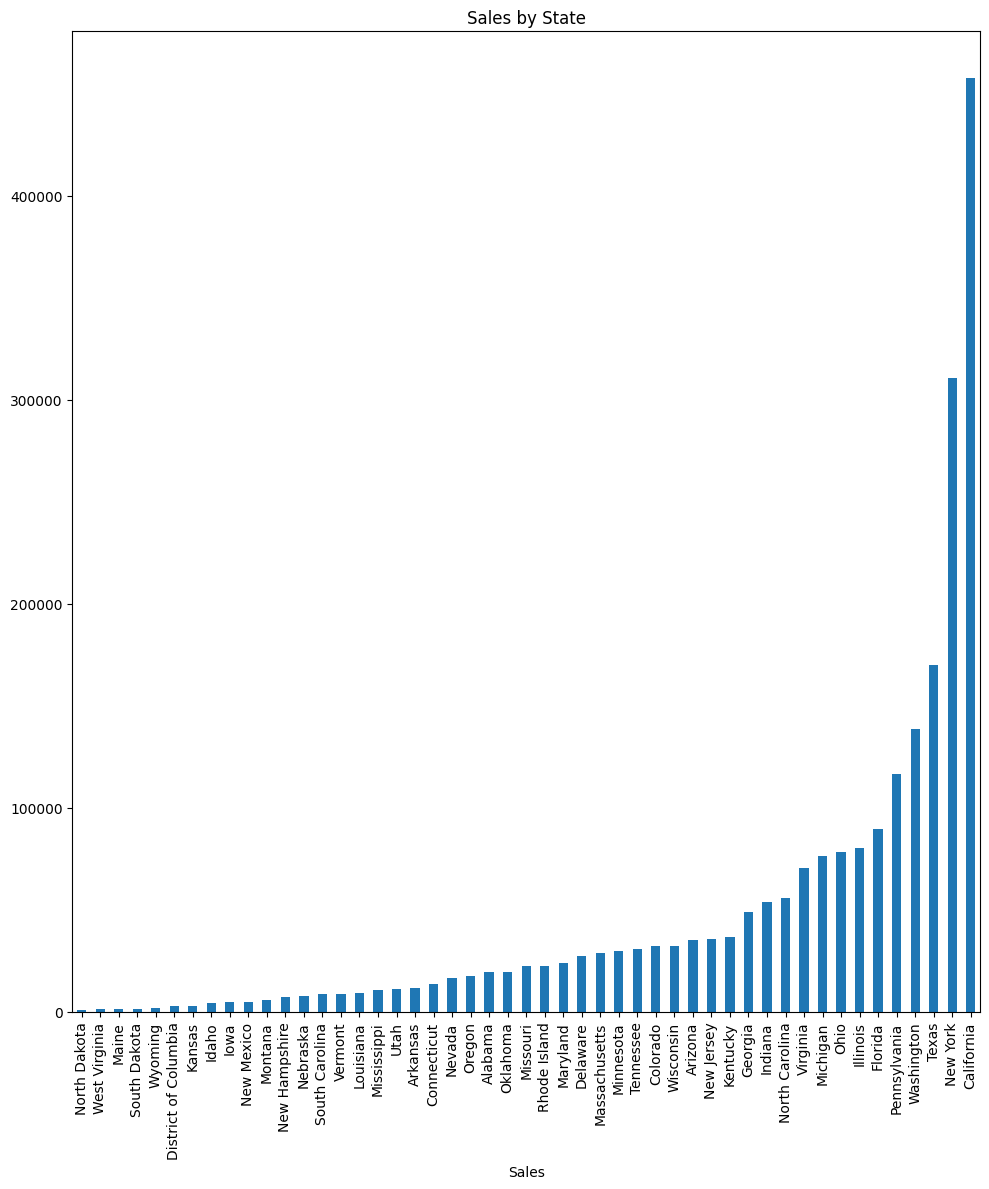


### Summary & Business Insights (for "Sales by State" Chart)

The bar chart clearly shows a highly **skewed sales distribution across U.S. states**. **California** emerges as the dominant contributor, with total sales surpassing **$450,000**, followed by **New York** and **Texas**. These three states alone contribute a substantial portion of the overall sales, highlighting their strategic importance. In contrast, states like **North Dakota**, **West Virginia**, and **Wyoming** recorded minimal sales, indicating either low market penetration or lower demand. The chart suggests that **focusing marketing and logistics efforts in top-performing states** like California, New York, and Texas could yield the highest ROI, while **exploring strategies to improve visibility and accessibility in underperforming regions** might unlock new growth opportunities.


In [11]:
# Sales by State
df.groupby('State')['Sales'].sum().sort_values().plot(kind='bar', figsize=(10, 12), title='Sales by State')
plt.xlabel("Sales")
plt.tight_layout()
plt.show()


summary = """
### Summary & Business Insights (for "Sales by State" Chart)

The bar chart clearly shows a highly **skewed sales distribution across U.S. states**. **California** emerges as the dominant contributor, with total sales surpassing **$450,000**, followed by **New York** and **Texas**. These three states alone contribute a substantial portion of the overall sales, highlighting their strategic importance. In contrast, states like **North Dakota**, **West Virginia**, and **Wyoming** recorded minimal sales, indicating either low market penetration or lower demand. The chart suggests that **focusing marketing and logistics efforts in top-performing states** like California, New York, and Texas could yield the highest ROI, while **exploring strategies to improve visibility and accessibility in underperforming regions** might unlock new growth opportunities.
"""

# Display the summary
display(Markdown(summary))

# Ship Mode Usage (Pie Chart)

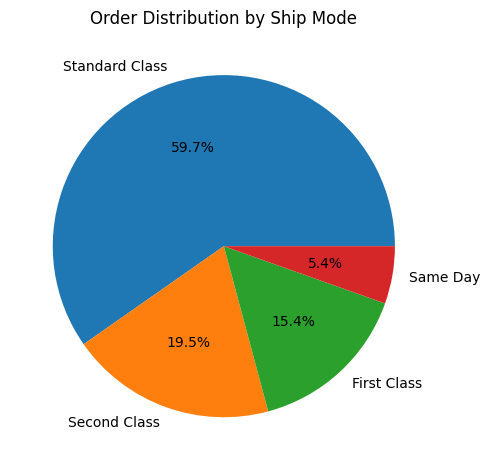


###  Summary & Business Insights (for "Order Distribution by Ship Mode" Chart)

The pie chart reveals that **Standard Class dominates the shipping method**, accounting for approximately **59.7%** of total orders. This indicates that most customers prefer economical shipping options, likely due to cost-efficiency and sufficient delivery speed.

**Second Class (19.5%)** and **First Class (15.4%)** follow, showing that a significant portion of customers are also willing to pay more for faster service. However, the **Same Day shipping** option is the least utilized at only **5.4%**, suggesting that either its availability is limited or the premium cost deters customers.

 **Business Insights:**
- **Standard Class should remain the logistical backbone**, given its popularity.
- There may be opportunities to **promote Same Day shipping** through discounts or loyalty programs.
- Analyzing customer profiles using First Class or Same Day can help target premium services better.

Overall, optimizing shipping costs while offering tiered service levels appears to align with customer preferences.


In [12]:
ship_counts = df['Ship Mode'].value_counts()
ship_counts.plot(kind='pie', autopct='%1.1f%%', title='Order Distribution by Ship Mode')
plt.ylabel('')
plt.tight_layout()
plt.show()

from IPython.display import Image, display, Markdown
summary = """
###  Summary & Business Insights (for "Order Distribution by Ship Mode" Chart)

The pie chart reveals that **Standard Class dominates the shipping method**, accounting for approximately **59.7%** of total orders. This indicates that most customers prefer economical shipping options, likely due to cost-efficiency and sufficient delivery speed.

**Second Class (19.5%)** and **First Class (15.4%)** follow, showing that a significant portion of customers are also willing to pay more for faster service. However, the **Same Day shipping** option is the least utilized at only **5.4%**, suggesting that either its availability is limited or the premium cost deters customers.

 **Business Insights:**
- **Standard Class should remain the logistical backbone**, given its popularity.
- There may be opportunities to **promote Same Day shipping** through discounts or loyalty programs.
- Analyzing customer profiles using First Class or Same Day can help target premium services better.

Overall, optimizing shipping costs while offering tiered service levels appears to align with customer preferences.
"""


display(Markdown(summary))

# Segment-wise Profit or Sales (Grouped Bar Chart)

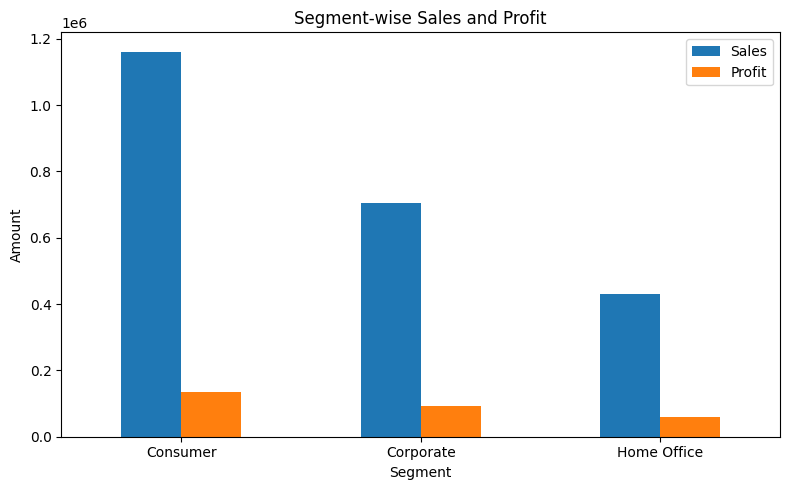


###  Summary & Business Insights (Segment-wise Sales and Profit)

This bar chart highlights the performance of three customer segments: **Consumer**, **Corporate**, and **Home Office**, in terms of both **sales** and **profit**.

-  **Consumer** segment leads in both sales and profit, generating **~1.16 million in sales** and **~150K in profit**. This indicates a strong and healthy margin, making it the most valuable segment.
-  **Corporate** segment shows **moderate sales (~700K)** and **lower profit (~90K)** compared to the Consumer segment. While it contributes well to revenue, its profit margin is comparatively lower.
-  **Home Office** segment lags behind, with **~430K in sales** and **only ~60K in profit**, making it the least profitable and smallest revenue-generating segment.

 **Business Insights:**
- Focus marketing and product efforts on the **Consumer segment**, as it delivers both volume and profit.
- Explore ways to **optimize operations for Corporate and Home Office** segments to improve profitability.
- Consider analyzing individual product performance within each segment to tailor pricing or promotional strategies.

Overall, the Consumer segment is the growth engine, while Corporate and Home Office may need strategic interventions to increase profit margins.


In [13]:
seg_group = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()

seg_group.plot(x='Segment', kind='bar', figsize=(8,5), title='Segment-wise Sales and Profit')
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

from IPython.display import Image, display, Markdown
summary = """
###  Summary & Business Insights (Segment-wise Sales and Profit)

This bar chart highlights the performance of three customer segments: **Consumer**, **Corporate**, and **Home Office**, in terms of both **sales** and **profit**.

-  **Consumer** segment leads in both sales and profit, generating **~1.16 million in sales** and **~150K in profit**. This indicates a strong and healthy margin, making it the most valuable segment.
-  **Corporate** segment shows **moderate sales (~700K)** and **lower profit (~90K)** compared to the Consumer segment. While it contributes well to revenue, its profit margin is comparatively lower.
-  **Home Office** segment lags behind, with **~430K in sales** and **only ~60K in profit**, making it the least profitable and smallest revenue-generating segment.

 **Business Insights:**
- Focus marketing and product efforts on the **Consumer segment**, as it delivers both volume and profit.
- Explore ways to **optimize operations for Corporate and Home Office** segments to improve profitability.
- Consider analyzing individual product performance within each segment to tailor pricing or promotional strategies.

Overall, the Consumer segment is the growth engine, while Corporate and Home Office may need strategic interventions to increase profit margins.
"""

# Display the summary
display(Markdown(summary))

# Profit Margin by Category (Box Plot)

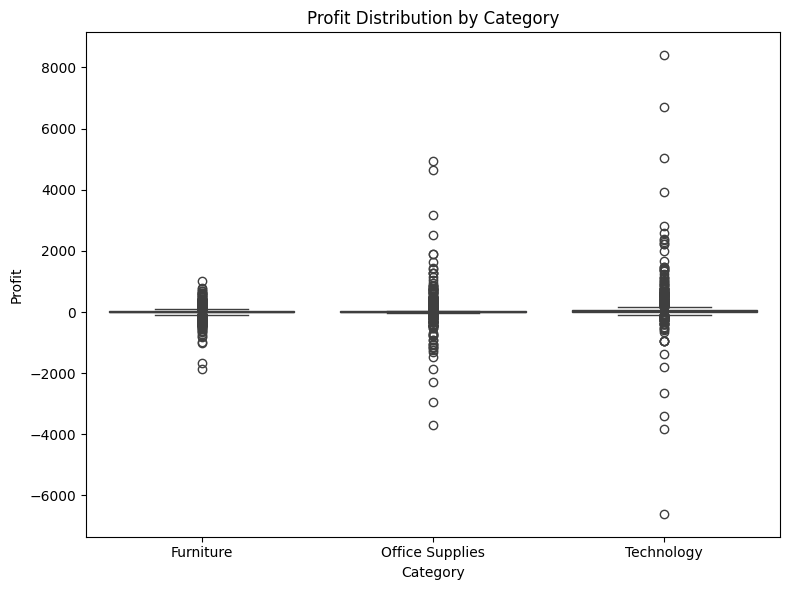


### Summary & Business Insights

The box plot titled **"Profit Distribution by Category"** displays the distribution of profit for three product categories: **Furniture**, **Office Supplies**, and **Technology**.

---

#### **Summary:**

- **Furniture:**
  - Shows a **relatively narrow profit distribution**.
  - **Median profit is near zero**.
  - Has a **small interquartile range (IQR)**, meaning most values are tightly clustered around the median.
  - Contains **few outliers**, both positive and negative, but not extreme.

- **Office Supplies:**
  - Has a **wider distribution** than Furniture.
  - The **median remains close to zero**.
  - Shows **significant number of outliers**, ranging from **~$4000** to **~-$2000**.

- **Technology:**
  - Exhibits the **widest and most variable profit distribution**.
  - Although the **box is narrow**, indicating concentration near the median, the category has **numerous extreme outliers**:
    - **Profits exceeding $8000**
    - **Losses plummeting below -$6000**

---

#### **Business Insights:**

1. **Technology = High Risk, High Reward**  
   - While **Technology** offers the **highest profit potential**, it also shows **extreme losses**.
   - Indicates **high variability** — may be due to **expensive items, returns, or inconsistent pricing**.
   - **Action Needed:** Dive into high-loss transactions to find patterns or systemic issues.

2. **Office Supplies = Balanced but Volatile**  
   - Represents a **moderate risk/reward** profile.
   - Presence of both **profitable and loss-making** outliers suggests **inconsistent profitability**.
   - Investigate **negative outlier transactions** to pinpoint underperforming sub-categories or discount issues.

3. **Furniture = Consistent, But Less Lucrative**  
   - Most **stable and predictable profit pattern**.
   - Fewer extreme values, suggesting **dependable but limited profit growth**.
   - Good for **baseline revenue**, but won’t drive exceptional gains.

4. **Actionable Recommendations:**
   - **Technology:**  
     → Analyze **loss-making outliers** to identify causes (e.g., product returns, aggressive discounting).  
     → Optimize pricing and marketing strategies to **maximize profitable patterns**.
     
   - **Office Supplies:**  
     → Investigate if specific **products or promotions** lead to losses.  
     → Adjust strategies for improved consistency.
     
   - **Across All Categories:**  
     → The **median profit ≈ 0** in all categories is a red flag.  
     → This implies many transactions are **barely breaking even or unprofitable**.  
     → **Revise pricing models, cost structures, and discounts** to boost overall profitability.


In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Category', y='Profit', data=df)
plt.title("Profit Distribution by Category")
plt.tight_layout()
plt.show()


from IPython.display import Markdown

summary_text = """
### Summary & Business Insights

The box plot titled **"Profit Distribution by Category"** displays the distribution of profit for three product categories: **Furniture**, **Office Supplies**, and **Technology**.

---

#### **Summary:**

- **Furniture:**
  - Shows a **relatively narrow profit distribution**.
  - **Median profit is near zero**.
  - Has a **small interquartile range (IQR)**, meaning most values are tightly clustered around the median.
  - Contains **few outliers**, both positive and negative, but not extreme.

- **Office Supplies:**
  - Has a **wider distribution** than Furniture.
  - The **median remains close to zero**.
  - Shows **significant number of outliers**, ranging from **~$4000** to **~-$2000**.

- **Technology:**
  - Exhibits the **widest and most variable profit distribution**.
  - Although the **box is narrow**, indicating concentration near the median, the category has **numerous extreme outliers**:
    - **Profits exceeding $8000**
    - **Losses plummeting below -$6000**

---

#### **Business Insights:**

1. **Technology = High Risk, High Reward**  
   - While **Technology** offers the **highest profit potential**, it also shows **extreme losses**.
   - Indicates **high variability** — may be due to **expensive items, returns, or inconsistent pricing**.
   - **Action Needed:** Dive into high-loss transactions to find patterns or systemic issues.

2. **Office Supplies = Balanced but Volatile**  
   - Represents a **moderate risk/reward** profile.
   - Presence of both **profitable and loss-making** outliers suggests **inconsistent profitability**.
   - Investigate **negative outlier transactions** to pinpoint underperforming sub-categories or discount issues.

3. **Furniture = Consistent, But Less Lucrative**  
   - Most **stable and predictable profit pattern**.
   - Fewer extreme values, suggesting **dependable but limited profit growth**.
   - Good for **baseline revenue**, but won’t drive exceptional gains.

4. **Actionable Recommendations:**
   - **Technology:**  
     → Analyze **loss-making outliers** to identify causes (e.g., product returns, aggressive discounting).  
     → Optimize pricing and marketing strategies to **maximize profitable patterns**.
     
   - **Office Supplies:**  
     → Investigate if specific **products or promotions** lead to losses.  
     → Adjust strategies for improved consistency.
     
   - **Across All Categories:**  
     → The **median profit ≈ 0** in all categories is a red flag.  
     → This implies many transactions are **barely breaking even or unprofitable**.  
     → **Revise pricing models, cost structures, and discounts** to boost overall profitability.
"""

Markdown(summary_text)



# Monthly Trend of Sales 

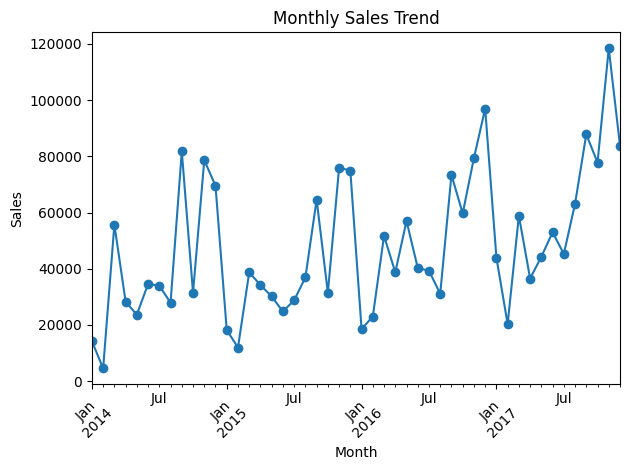


###  Summary & Business Insights (Monthly Sales Trend)

This line chart visualizes the **monthly sales performance from January 2014 to December 2017**.

-  **Sales peak in November and December** every year, driven by **holiday demand**.  
-  **Sales dip in January and February**, showing a consistent **post-holiday slump**.  
-  There is a **clear upward trend**, with each year **outperforming the last**.  
-  The **highest monthly sales** occurred in **December 2017**, exceeding **\$120K**, indicating **strong momentum**.

---

###  Business Insights:

-  **Capitalize on Q4 (Nov–Dec)** with increased **marketing, inventory, and staffing**, as it generates the **highest revenue**.
-  **Address the January–February slump** using **New Year promotions**, **product bundling**, or **return/exchange campaigns** to sustain engagement.
-  **Investigate the 2017 sales spike** to identify and **replicate successful strategies** across future years.
-  **Plan inventory and logistics around the sales cycle**, ensuring you are well-prepared for both **surges and slowdowns**.
-  **Year-over-year growth confirms strong business health**, supporting further **investment and scaling**.

---

 **Conclusion:**  
The business is on a **sustained growth path** with **predictable seasonal patterns**. Aligning strategy with these patterns will **maximize revenue opportunities** and **mitigate downturns**, leading to more consistent performance throughout the year.


In [15]:
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend')
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


from IPython.display import Markdown

summary_text = """
###  Summary & Business Insights (Monthly Sales Trend)

This line chart visualizes the **monthly sales performance from January 2014 to December 2017**.

-  **Sales peak in November and December** every year, driven by **holiday demand**.  
-  **Sales dip in January and February**, showing a consistent **post-holiday slump**.  
-  There is a **clear upward trend**, with each year **outperforming the last**.  
-  The **highest monthly sales** occurred in **December 2017**, exceeding **\\$120K**, indicating **strong momentum**.

---

###  Business Insights:

-  **Capitalize on Q4 (Nov–Dec)** with increased **marketing, inventory, and staffing**, as it generates the **highest revenue**.
-  **Address the January–February slump** using **New Year promotions**, **product bundling**, or **return/exchange campaigns** to sustain engagement.
-  **Investigate the 2017 sales spike** to identify and **replicate successful strategies** across future years.
-  **Plan inventory and logistics around the sales cycle**, ensuring you are well-prepared for both **surges and slowdowns**.
-  **Year-over-year growth confirms strong business health**, supporting further **investment and scaling**.

---

 **Conclusion:**  
The business is on a **sustained growth path** with **predictable seasonal patterns**. Aligning strategy with these patterns will **maximize revenue opportunities** and **mitigate downturns**, leading to more consistent performance throughout the year.
"""

display(Markdown(summary_text))

# Top 10 Customers by Sales 

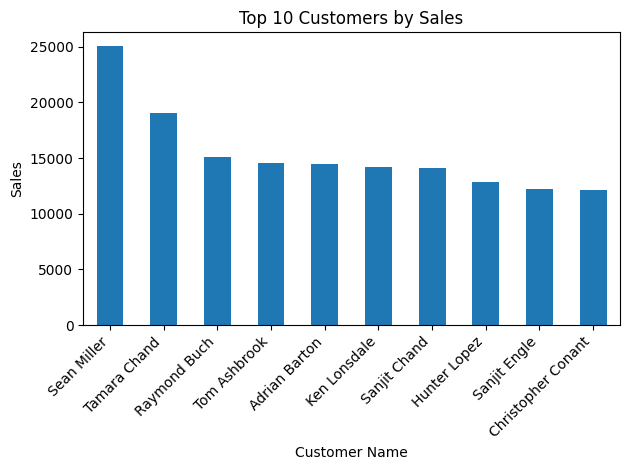


### Summary & Business Insights

The bar chart titled **"Top 10 Customers by Sales"** displays the total sales generated by the ten highest-spending customers. The chart is sorted in descending order, from the highest-spending customer to the lowest.

---

#### **Summary:**

- **Top Customer:**
  - **Sean Miller** is the clear leader with sales of approximately **$25,000**.
  - This is a significant lead over the next customer, highlighting a high concentration of sales in a single individual.

- **Second Tier Customers:**
  - **Tamara Chand** is the second-highest contributor, with sales of nearly **$19,000**.
  - The remaining customers in the top 10 form a tight cluster, with sales ranging from **$12,000** to **$15,000**.
  
- **Customer Contribution:**
  - The sales figures show a steep drop-off after the top two customers.
  - This indicates that a very small group of customers drives a disproportionately large portion of the business's revenue.

---

#### **Business Insights:**

1.  **Sales Concentration & Risk:**
    - The business relies heavily on a few top customers. While this indicates strong relationships with key accounts, it also poses a risk.
    - **Action Needed:** The business should focus on retaining these high-value customers. The loss of Sean Miller, for example, would have a substantial negative impact on revenue.

2.  **Opportunity for Customer Loyalty:**
    - The top customers are prime candidates for enhanced customer relationship management (CRM) and loyalty programs.
    - **Action Needed:** Implement personalized outreach, offer exclusive benefits, or create a tiered loyalty program to reward and further incentivize these customers, strengthening their bond with the business.

3.  **Nurturing the Next Tier:**
    - The tight grouping of customers from third to tenth place suggests an opportunity to grow this segment.
    - **Action Needed:** Analyze the purchasing behaviors of these customers to identify opportunities for cross-selling or up-selling to increase their sales volume and reduce reliance on the top two.

4.  **Strategic Focus:**
    - The company should not only focus on acquiring new customers but also on maximizing the lifetime value of its existing high-value customers.
    - **Action Needed:** Allocate resources to analyze the products and services that these top customers purchase most frequently and ensure their availability and quality remain high.


In [16]:
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

top_customers.plot(kind='bar', title='Top 10 Customers by Sales')
plt.ylabel("Sales")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


from IPython.display import Markdown

summary_text = """
### Summary & Business Insights

The bar chart titled **"Top 10 Customers by Sales"** displays the total sales generated by the ten highest-spending customers. The chart is sorted in descending order, from the highest-spending customer to the lowest.

---

#### **Summary:**

- **Top Customer:**
  - **Sean Miller** is the clear leader with sales of approximately **$25,000**.
  - This is a significant lead over the next customer, highlighting a high concentration of sales in a single individual.

- **Second Tier Customers:**
  - **Tamara Chand** is the second-highest contributor, with sales of nearly **$19,000**.
  - The remaining customers in the top 10 form a tight cluster, with sales ranging from **$12,000** to **$15,000**.
  
- **Customer Contribution:**
  - The sales figures show a steep drop-off after the top two customers.
  - This indicates that a very small group of customers drives a disproportionately large portion of the business's revenue.

---

#### **Business Insights:**

1.  **Sales Concentration & Risk:**
    - The business relies heavily on a few top customers. While this indicates strong relationships with key accounts, it also poses a risk.
    - **Action Needed:** The business should focus on retaining these high-value customers. The loss of Sean Miller, for example, would have a substantial negative impact on revenue.

2.  **Opportunity for Customer Loyalty:**
    - The top customers are prime candidates for enhanced customer relationship management (CRM) and loyalty programs.
    - **Action Needed:** Implement personalized outreach, offer exclusive benefits, or create a tiered loyalty program to reward and further incentivize these customers, strengthening their bond with the business.

3.  **Nurturing the Next Tier:**
    - The tight grouping of customers from third to tenth place suggests an opportunity to grow this segment.
    - **Action Needed:** Analyze the purchasing behaviors of these customers to identify opportunities for cross-selling or up-selling to increase their sales volume and reduce reliance on the top two.

4.  **Strategic Focus:**
    - The company should not only focus on acquiring new customers but also on maximizing the lifetime value of its existing high-value customers.
    - **Action Needed:** Allocate resources to analyze the products and services that these top customers purchase most frequently and ensure their availability and quality remain high.
"""

display(Markdown(summary_text))



# State-wise Profit

<>:10: SyntaxWarning: invalid escape sequence '\$'
<>:10: SyntaxWarning: invalid escape sequence '\$'
C:\Users\FAUZAN\AppData\Local\Temp\ipykernel_9176\3289908049.py:10: SyntaxWarning: invalid escape sequence '\$'
  summary_text = """


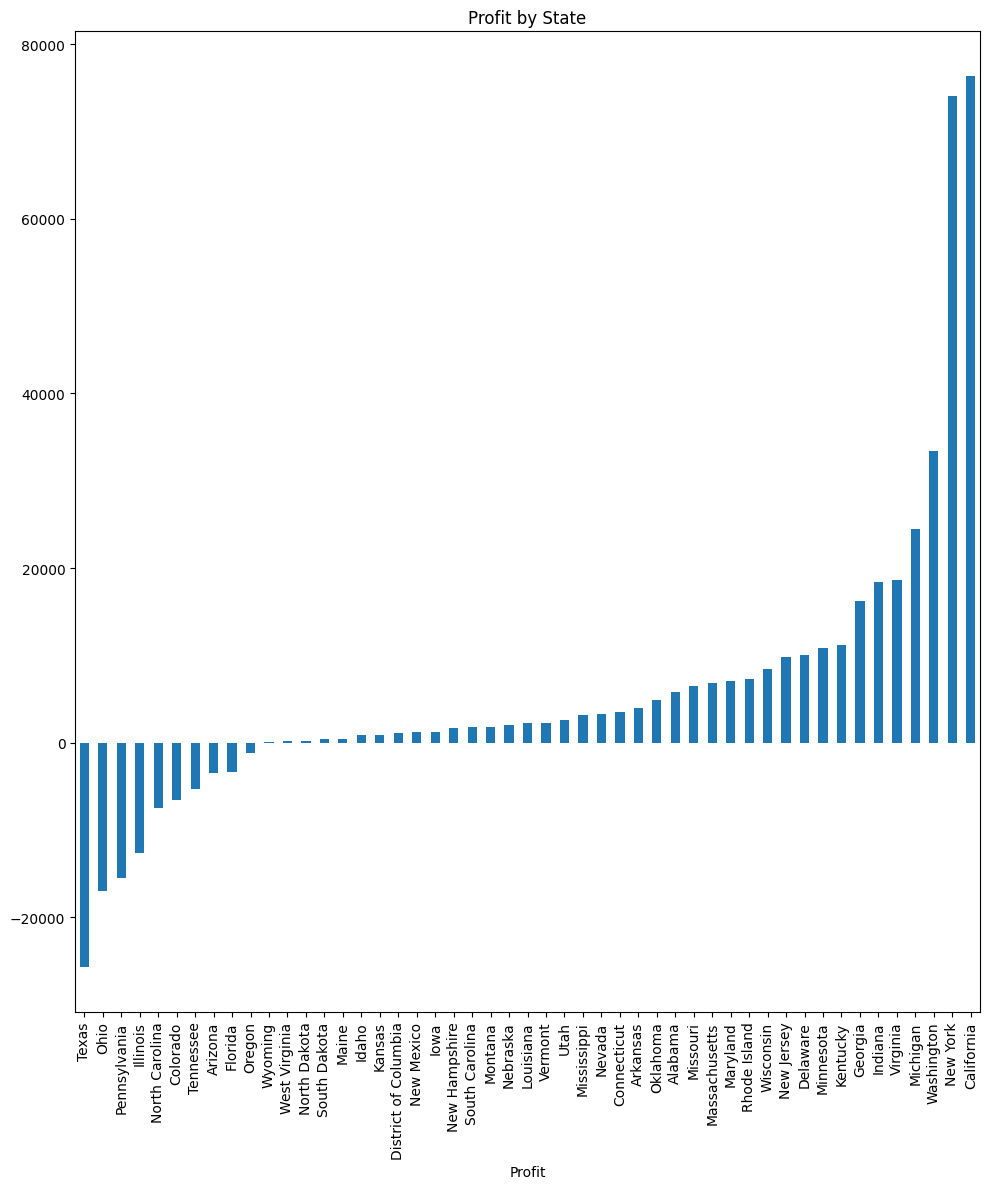


### Summary & Business Insights

The bar chart titled **"Profit by State"** displays the total profit generated from each state, sorted in ascending order from the lowest profit (highest loss) to the highest profit.

---

#### **Summary:**

- **States with Significant Losses:**
  - **Texas** and **Ohio** stand out with the largest losses, each exceeding **-$20,000**.
  - Several other states, including **Pennsylvania**, **Illinois**, **North Carolina**, and **Colorado**, also show negative profits, though less severe.

- **States with Near-Zero or Low Profits:**
  - A large number of states cluster around the zero-profit line, indicating they are barely breaking even or generating minimal profit. These include states like **Tennessee**, **Arizona**, **Florida**, **Oregon**, and many others in the middle of the chart.

- **States with Significant Profits:**
  - **California** is the clear leader, generating a very high profit, well over **\$80,000**.
  - Other states contributing substantial profits include **New York**, **Washington**, **Michigan**, and **Virginia**, though their profits are significantly lower than California's.

---

#### **Business Insights:**

1.  **Geographic Profit Disparity:**
    - There's a stark contrast in profitability across states. A few states (e.g., California, New York) are highly profitable, while others (e.g., Texas, Ohio) are significant loss centers.
    - **Action Needed:** This indicates a need for a geographically targeted strategy rather than a one-size-fits-all approach.

2.  **Urgent Intervention for Loss-Making States:**
    - **Texas and Ohio** require immediate attention. The business must investigate the root causes of these substantial losses. This could involve:
      - High operational costs (e.g., shipping, warehousing).
      - Aggressive discounting or promotional activities.
      - High return rates or customer service issues.
      - Intense competition driving down prices.
      - Poor product-market fit in those regions.
    - **Action Needed:** Develop specific action plans for these states, potentially including adjusting pricing, optimizing logistics, or re-evaluating product offerings.

3.  **Optimize for High-Profit States:**
    - **California** is a major success story. The business should analyze what makes California so profitable and try to replicate those success factors in other high-potential states.
    - **Action Needed:** Invest more in marketing and sales efforts in top-performing states to maximize their contribution.

4.  **Review Mid-Tier States:**
    - For states with near-zero or low profits, there's an opportunity to move them into profitability.
    - **Action Needed:** Small adjustments to pricing, targeted promotions, or cost-cutting measures could make a significant difference in these regions.

5.  **Overall Profitability Strategy:**
    - The large number of states with low or negative profits suggests that overall profitability might be dragged down by underperforming regions.
    - **Action Needed:** A comprehensive review of regional strategies, including sales targets, marketing spend, and operational efficiencies, is essential to improve the aggregate profit.


In [17]:
df.groupby('State')['Profit'].sum().sort_values().plot(kind='bar', figsize=(10, 12))
plt.title("Profit by State")
plt.xlabel("Profit")
plt.tight_layout()
plt.show()


from IPython.display import Markdown

summary_text = """
### Summary & Business Insights

The bar chart titled **"Profit by State"** displays the total profit generated from each state, sorted in ascending order from the lowest profit (highest loss) to the highest profit.

---

#### **Summary:**

- **States with Significant Losses:**
  - **Texas** and **Ohio** stand out with the largest losses, each exceeding **-$20,000**.
  - Several other states, including **Pennsylvania**, **Illinois**, **North Carolina**, and **Colorado**, also show negative profits, though less severe.

- **States with Near-Zero or Low Profits:**
  - A large number of states cluster around the zero-profit line, indicating they are barely breaking even or generating minimal profit. These include states like **Tennessee**, **Arizona**, **Florida**, **Oregon**, and many others in the middle of the chart.

- **States with Significant Profits:**
  - **California** is the clear leader, generating a very high profit, well over **\$80,000**.
  - Other states contributing substantial profits include **New York**, **Washington**, **Michigan**, and **Virginia**, though their profits are significantly lower than California's.

---

#### **Business Insights:**

1.  **Geographic Profit Disparity:**
    - There's a stark contrast in profitability across states. A few states (e.g., California, New York) are highly profitable, while others (e.g., Texas, Ohio) are significant loss centers.
    - **Action Needed:** This indicates a need for a geographically targeted strategy rather than a one-size-fits-all approach.

2.  **Urgent Intervention for Loss-Making States:**
    - **Texas and Ohio** require immediate attention. The business must investigate the root causes of these substantial losses. This could involve:
      - High operational costs (e.g., shipping, warehousing).
      - Aggressive discounting or promotional activities.
      - High return rates or customer service issues.
      - Intense competition driving down prices.
      - Poor product-market fit in those regions.
    - **Action Needed:** Develop specific action plans for these states, potentially including adjusting pricing, optimizing logistics, or re-evaluating product offerings.

3.  **Optimize for High-Profit States:**
    - **California** is a major success story. The business should analyze what makes California so profitable and try to replicate those success factors in other high-potential states.
    - **Action Needed:** Invest more in marketing and sales efforts in top-performing states to maximize their contribution.

4.  **Review Mid-Tier States:**
    - For states with near-zero or low profits, there's an opportunity to move them into profitability.
    - **Action Needed:** Small adjustments to pricing, targeted promotions, or cost-cutting measures could make a significant difference in these regions.

5.  **Overall Profitability Strategy:**
    - The large number of states with low or negative profits suggests that overall profitability might be dragged down by underperforming regions.
    - **Action Needed:** A comprehensive review of regional strategies, including sales targets, marketing spend, and operational efficiencies, is essential to improve the aggregate profit.
"""

display(Markdown(summary_text))


# Sub-Categories with Negative Profit

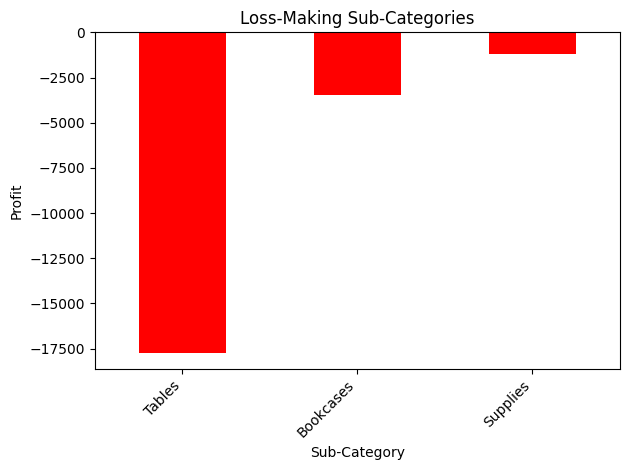


### Summary & Business Insights

The bar chart titled **"Loss-Making Sub-Categories"** clearly identifies three specific product sub-categories that are currently incurring losses for the business. The bars are colored red, visually emphasizing their negative profit contribution.

---

#### **Summary:**

- **Tables:**
  - This sub-category is by far the largest contributor to losses, with a negative profit of approximately **-$17,500**. This is a significant drain on overall profitability.

- **Bookcases:**
  - Bookcases also show a substantial loss, estimated around **-$3,500**. While not as severe as Tables, it's still a considerable negative impact.

- **Supplies:**
  - The "Supplies" sub-category is the third loss-making area, with a loss of roughly **-$1,000**. This is the smallest loss among the three, but still indicates an area needing attention.

---

#### **Business Insights:**

1.  **Tables are a Critical Problem Area:**
    - The overwhelming loss from "Tables" demands immediate and thorough investigation. This sub-category is severely impacting the business's overall profitability.
    - **Action Needed:** Conduct an in-depth analysis of "Tables" to understand the root causes of losses. This could involve:
      - High manufacturing/procurement costs.
      - Excessive shipping or handling expenses.
      - Aggressive discounting or pricing errors.
      - High return rates or warranty claims.
      - Poor quality leading to customer dissatisfaction.
      - Intense competition driving down margins.

2.  **Addressing Bookcases and Supplies:**
    - While smaller than "Tables," the losses from "Bookcases" and "Supplies" are still significant enough to warrant corrective action.
    - **Action Needed:** For "Bookcases," investigate similar factors as "Tables" but with a focus on their specific cost structures and market dynamics. For "Supplies," even small adjustments to pricing or sourcing could quickly move this into profitability.

3.  **Strategic Decision-Making:**
    - For consistently loss-making sub-categories, the business needs to consider strategic decisions beyond just optimization.
    - **Action Needed:**
      - **Re-evaluate product lines:** Is it feasible to make these sub-categories profitable? If not, consider discontinuing or significantly restructuring them.
      - **Supplier negotiation:** Can better terms be negotiated with suppliers for these items?
      - **Pricing strategy:** Are these items priced competitively and profitably?
      - **Bundling/Promotions:** Are current promotional strategies inadvertently driving losses?

4.  **Impact on Overall Profitability:**
    - These three sub-categories are directly eroding the company's profits. Addressing them effectively could significantly boost the overall bottom line.
    - **Action Needed:** Prioritize efforts on "Tables" first due to its disproportionate impact, then move to "Bookcases" and "Supplies."

In summary, the business has clear areas of concern in "Tables," "Bookcases," and "Supplies." Aggressive action, particularly for "Tables," is crucial to stem losses and improve overall financial health.


In [18]:
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()
loss_subcats = subcat_profit[subcat_profit < 0]

loss_subcats.plot(kind='bar', color='red', title='Loss-Making Sub-Categories')
plt.ylabel("Profit")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


from IPython.display import Markdown

summary_text = """
### Summary & Business Insights

The bar chart titled **"Loss-Making Sub-Categories"** clearly identifies three specific product sub-categories that are currently incurring losses for the business. The bars are colored red, visually emphasizing their negative profit contribution.

---

#### **Summary:**

- **Tables:**
  - This sub-category is by far the largest contributor to losses, with a negative profit of approximately **-$17,500**. This is a significant drain on overall profitability.

- **Bookcases:**
  - Bookcases also show a substantial loss, estimated around **-$3,500**. While not as severe as Tables, it's still a considerable negative impact.

- **Supplies:**
  - The "Supplies" sub-category is the third loss-making area, with a loss of roughly **-$1,000**. This is the smallest loss among the three, but still indicates an area needing attention.

---

#### **Business Insights:**

1.  **Tables are a Critical Problem Area:**
    - The overwhelming loss from "Tables" demands immediate and thorough investigation. This sub-category is severely impacting the business's overall profitability.
    - **Action Needed:** Conduct an in-depth analysis of "Tables" to understand the root causes of losses. This could involve:
      - High manufacturing/procurement costs.
      - Excessive shipping or handling expenses.
      - Aggressive discounting or pricing errors.
      - High return rates or warranty claims.
      - Poor quality leading to customer dissatisfaction.
      - Intense competition driving down margins.

2.  **Addressing Bookcases and Supplies:**
    - While smaller than "Tables," the losses from "Bookcases" and "Supplies" are still significant enough to warrant corrective action.
    - **Action Needed:** For "Bookcases," investigate similar factors as "Tables" but with a focus on their specific cost structures and market dynamics. For "Supplies," even small adjustments to pricing or sourcing could quickly move this into profitability.

3.  **Strategic Decision-Making:**
    - For consistently loss-making sub-categories, the business needs to consider strategic decisions beyond just optimization.
    - **Action Needed:**
      - **Re-evaluate product lines:** Is it feasible to make these sub-categories profitable? If not, consider discontinuing or significantly restructuring them.
      - **Supplier negotiation:** Can better terms be negotiated with suppliers for these items?
      - **Pricing strategy:** Are these items priced competitively and profitably?
      - **Bundling/Promotions:** Are current promotional strategies inadvertently driving losses?

4.  **Impact on Overall Profitability:**
    - These three sub-categories are directly eroding the company's profits. Addressing them effectively could significantly boost the overall bottom line.
    - **Action Needed:** Prioritize efforts on "Tables" first due to its disproportionate impact, then move to "Bookcases" and "Supplies."

In summary, the business has clear areas of concern in "Tables," "Bookcases," and "Supplies." Aggressive action, particularly for "Tables," is crucial to stem losses and improve overall financial health.
"""

display(Markdown(summary_text))

# Least Selling Products 

C:\Users\FAUZAN\AppData\Local\Temp\ipykernel_9176\3102425635.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


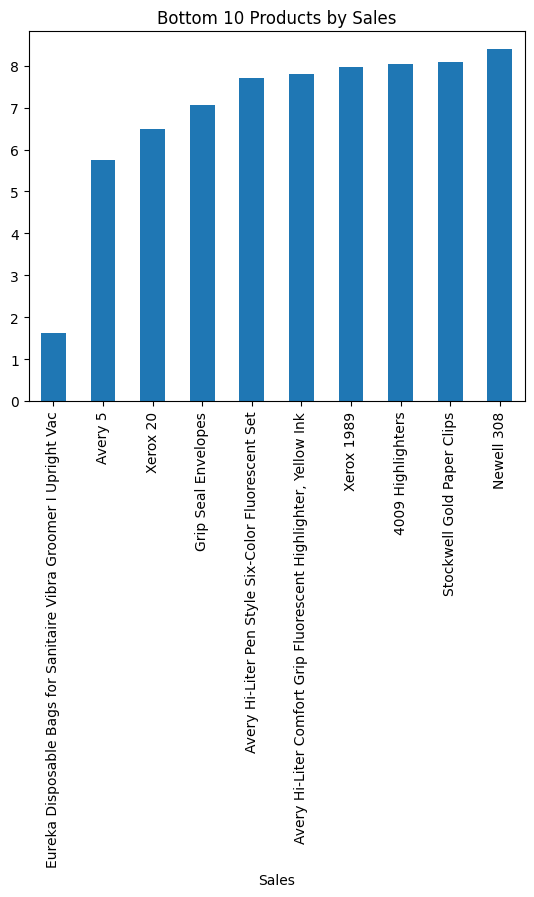


### Summary & Business Insights

The bar chart titled **"Bottom 10 Products by Sales"** displays the sales performance of the ten worst-performing products, sorted in ascending order. The extremely low sales figures indicate that these products are not significant revenue generators.

---

#### **Summary:**

- **Lowest Performer:**
  - The **"Eureka Disposable Bags"** item is a significant outlier at the absolute bottom, with sales of less than **$2**.
  
- **Product Sales Range:**
  - Sales for all products on this list are very low, with the range spanning from under **$2** to just over **$8**.
  - The other nine products are tightly clustered, with sales figures between **$5** and **$8.5**.

- **Product Type:**
  - A number of these low-performing items are standard office supplies, such as highlighters, paper clips, and envelopes.

---

#### **Business Insights:**

1.  **Addressing Dead Inventory:**
    - The extremely low sales figures strongly suggest that these products are **obsolete or slow-moving ("dead") inventory**.
    - **Action Needed:**
      - **Financial Analysis:** Determine the cost of carrying this inventory (storage, capital tied up) versus the minimal revenue it generates.
      - **Inventory Management:** Consider a strategy to clear this stock, such as aggressive markdowns or bundling with popular products.

2.  **Evaluating Product Mix:**
    - The presence of multiple similar items on the list (e.g., two types of highlighters) may indicate a **product redundancy issue**.
    - **Action Needed:**
      - **Consolidate:** Review the entire product catalog and consider consolidating or discontinuing similar low-performing products.
      - **Sourcing:** Re-evaluate sourcing and purchasing decisions to focus on items with higher demand.

3.  **Profitability Check:**
    - While the chart only shows sales, the true concern lies in **profitability**. Low-selling products are often also unprofitable when all costs are factored in.
    - **Action Needed:**
      - **Profit Analysis:** Conduct a full profitability analysis for each item on this list, including costs of goods sold, overhead, and marketing spend.
      - **Discontinuation:** If a product is both a poor seller and unprofitable, it is a prime candidate for discontinuation.

4.  **Strategic Focus:**
    - These products are not contributing to the business's growth and are likely a drain on resources.
    - **Action Needed:**
      - **Free up Capital:** Discontinuing these items will free up capital and resources that can be reallocated to sourcing new, more profitable products or investing in marketing for best-sellers.

In summary, the "Bottom 10 Products by Sales" list serves as a critical signal for the business to perform a major cleanup of its product catalog. The focus should be on discontinuing the worst performers and reallocating resources to more profitable and high-demand areas.


In [19]:
least_selling = df.groupby('Product Name')['Sales'].sum().sort_values().head(10)

least_selling.plot(kind='bar', title='Bottom 10 Products by Sales')
plt.xlabel("Sales")
plt.tight_layout()
plt.show()


from IPython.display import Markdown

summary_text = """
### Summary & Business Insights

The bar chart titled **"Bottom 10 Products by Sales"** displays the sales performance of the ten worst-performing products, sorted in ascending order. The extremely low sales figures indicate that these products are not significant revenue generators.

---

#### **Summary:**

- **Lowest Performer:**
  - The **"Eureka Disposable Bags"** item is a significant outlier at the absolute bottom, with sales of less than **$2**.
  
- **Product Sales Range:**
  - Sales for all products on this list are very low, with the range spanning from under **$2** to just over **$8**.
  - The other nine products are tightly clustered, with sales figures between **$5** and **$8.5**.

- **Product Type:**
  - A number of these low-performing items are standard office supplies, such as highlighters, paper clips, and envelopes.

---

#### **Business Insights:**

1.  **Addressing Dead Inventory:**
    - The extremely low sales figures strongly suggest that these products are **obsolete or slow-moving ("dead") inventory**.
    - **Action Needed:**
      - **Financial Analysis:** Determine the cost of carrying this inventory (storage, capital tied up) versus the minimal revenue it generates.
      - **Inventory Management:** Consider a strategy to clear this stock, such as aggressive markdowns or bundling with popular products.

2.  **Evaluating Product Mix:**
    - The presence of multiple similar items on the list (e.g., two types of highlighters) may indicate a **product redundancy issue**.
    - **Action Needed:**
      - **Consolidate:** Review the entire product catalog and consider consolidating or discontinuing similar low-performing products.
      - **Sourcing:** Re-evaluate sourcing and purchasing decisions to focus on items with higher demand.

3.  **Profitability Check:**
    - While the chart only shows sales, the true concern lies in **profitability**. Low-selling products are often also unprofitable when all costs are factored in.
    - **Action Needed:**
      - **Profit Analysis:** Conduct a full profitability analysis for each item on this list, including costs of goods sold, overhead, and marketing spend.
      - **Discontinuation:** If a product is both a poor seller and unprofitable, it is a prime candidate for discontinuation.

4.  **Strategic Focus:**
    - These products are not contributing to the business's growth and are likely a drain on resources.
    - **Action Needed:**
      - **Free up Capital:** Discontinuing these items will free up capital and resources that can be reallocated to sourcing new, more profitable products or investing in marketing for best-sellers.

In summary, the "Bottom 10 Products by Sales" list serves as a critical signal for the business to perform a major cleanup of its product catalog. The focus should be on discontinuing the worst performers and reallocating resources to more profitable and high-demand areas.
"""

display(Markdown(summary_text))

#  Most Unprofitable Products

C:\Users\FAUZAN\AppData\Local\Temp\ipykernel_9176\198421584.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


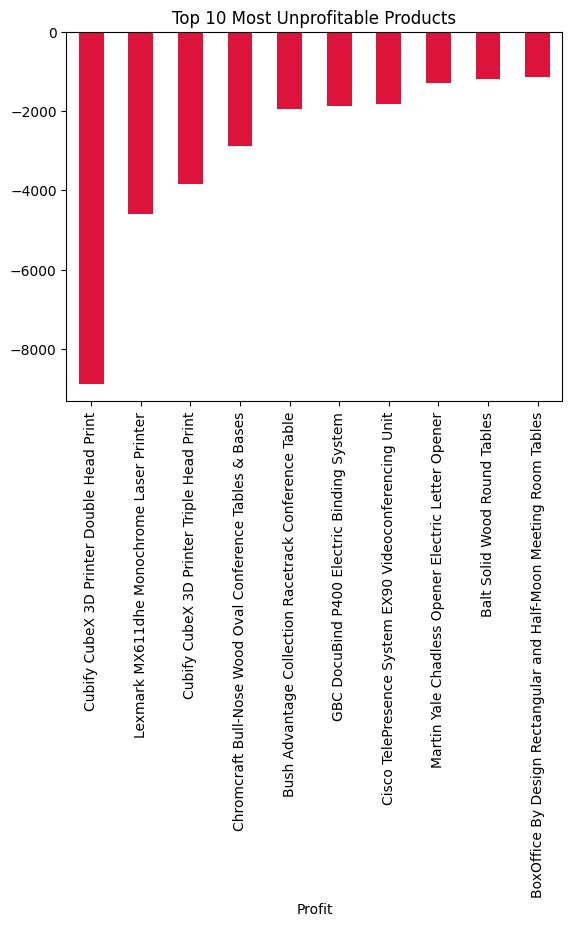


### Summary & Business Insights

The bar chart titled **"Top 10 Most Unprofitable Products"** clearly identifies the ten products that are generating the largest losses for the business. All bars are in the negative, visually emphasizing their negative impact on profit.

---

#### **Summary:**

- **Largest Loss:**
  - The **"Cubify Cubex 3D Printer Double Head Print"** is the most significant loss leader, with a staggering loss of over **-$8,500**.
  
- **Other Major Losses:**
  - The next two products, the **"Lexmark Monochrome Laser Printer"** and the **"Cubify Cubex 3D Printer Triple Head Print"**, also incur substantial losses of around **-$4,500** and **-$4,000**, respectively.

- **Consistent Unprofitability:**
  - The remaining products on the list all contribute to a consistent pattern of losses, ranging from approximately **-$3,000** down to **-$1,000**.
  
- **Product Type:**
  - A key trend is the presence of several high-tech items, such as 3D printers and laser printers, suggesting a potential systemic issue within this category.

---

#### **Business Insights:**

1.  **Urgent Action for Top Loss-Makers:**
    - The top three products, especially the 3D printers, are a major drain on company finances.
    - **Action Needed:**
      - **Root Cause Analysis:** Immediately investigate the factors causing these losses, such as high costs of goods, shipping fees, or warranty claims.
      - **Pricing Strategy:** Review and adjust pricing to ensure these items are not being sold below a profitable threshold.

2.  **Reviewing the High-Tech Category:**
    - The repeated appearance of technology products on this list points to a broader problem.
    - **Action Needed:**
      - **Portfolio Audit:** Conduct a full review of all technology offerings to differentiate between highly profitable and consistently unprofitable items.
      - **Strategic Discontinuation:** Consider removing products that cannot be made profitable, such as the worst-performing 3D printers.

3.  **Implementing a Profitability Threshold:**
    - The existence of a "Top 10" list for unprofitable products indicates a lack of a proactive profitability management system.
    - **Action Needed:**
      - **Set a Guideline:** Establish a clear financial threshold for product profitability.
      - **Automate Monitoring:** Use this guideline to flag and review any product that falls below a certain profit level, preventing future significant losses.

4.  **Impact on Overall Profitability:**
    - These ten products are directly eroding the company's overall profits. Addressing them is not just about stopping losses but also about significantly boosting the company's bottom line.
    - **Action Needed:** Prioritize efforts on the most severe loss-makers first to achieve the quickest and most impactful financial recovery.

In summary, this analysis provides a clear mandate to address critical flaws in the product portfolio, particularly within the technology category. The business must act decisively to stem these losses and implement new strategies to ensure profitability.


In [20]:
unprofitable = df.groupby('Product Name')['Profit'].sum().sort_values().head(10)

unprofitable.plot(kind='bar', color='crimson', title='Top 10 Most Unprofitable Products')
plt.xlabel("Profit")
plt.tight_layout()
plt.show()


from IPython.display import Markdown

summary_text = """
### Summary & Business Insights

The bar chart titled **"Top 10 Most Unprofitable Products"** clearly identifies the ten products that are generating the largest losses for the business. All bars are in the negative, visually emphasizing their negative impact on profit.

---

#### **Summary:**

- **Largest Loss:**
  - The **"Cubify Cubex 3D Printer Double Head Print"** is the most significant loss leader, with a staggering loss of over **-$8,500**.
  
- **Other Major Losses:**
  - The next two products, the **"Lexmark Monochrome Laser Printer"** and the **"Cubify Cubex 3D Printer Triple Head Print"**, also incur substantial losses of around **-$4,500** and **-$4,000**, respectively.

- **Consistent Unprofitability:**
  - The remaining products on the list all contribute to a consistent pattern of losses, ranging from approximately **-$3,000** down to **-$1,000**.
  
- **Product Type:**
  - A key trend is the presence of several high-tech items, such as 3D printers and laser printers, suggesting a potential systemic issue within this category.

---

#### **Business Insights:**

1.  **Urgent Action for Top Loss-Makers:**
    - The top three products, especially the 3D printers, are a major drain on company finances.
    - **Action Needed:**
      - **Root Cause Analysis:** Immediately investigate the factors causing these losses, such as high costs of goods, shipping fees, or warranty claims.
      - **Pricing Strategy:** Review and adjust pricing to ensure these items are not being sold below a profitable threshold.

2.  **Reviewing the High-Tech Category:**
    - The repeated appearance of technology products on this list points to a broader problem.
    - **Action Needed:**
      - **Portfolio Audit:** Conduct a full review of all technology offerings to differentiate between highly profitable and consistently unprofitable items.
      - **Strategic Discontinuation:** Consider removing products that cannot be made profitable, such as the worst-performing 3D printers.

3.  **Implementing a Profitability Threshold:**
    - The existence of a "Top 10" list for unprofitable products indicates a lack of a proactive profitability management system.
    - **Action Needed:**
      - **Set a Guideline:** Establish a clear financial threshold for product profitability.
      - **Automate Monitoring:** Use this guideline to flag and review any product that falls below a certain profit level, preventing future significant losses.

4.  **Impact on Overall Profitability:**
    - These ten products are directly eroding the company's overall profits. Addressing them is not just about stopping losses but also about significantly boosting the company's bottom line.
    - **Action Needed:** Prioritize efforts on the most severe loss-makers first to achieve the quickest and most impactful financial recovery.

In summary, this analysis provides a clear mandate to address critical flaws in the product portfolio, particularly within the technology category. The business must act decisively to stem these losses and implement new strategies to ensure profitability.
"""

display(Markdown(summary_text))


# High Discount Impact on Profit

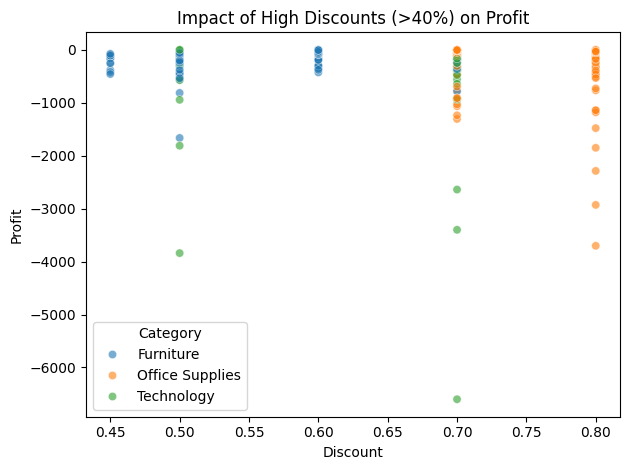


### Summary & Business Insights

The scatter plot titled **"Impact of High Discounts (>40%) on Profit"** visualizes how high discount rates affect profitability across three product categories: **Furniture**, **Office Supplies**, and **Technology**.

---

#### **Summary:**

- **Overall Impact:**
  - The plot reveals a direct and consistently negative relationship: **every transaction with a high discount results in a loss**, as all data points lie below the zero-profit line.
  
- **Loss Severity by Category:**
  - **Technology** transactions suffer the most severe losses, with a single transaction at a 70% discount leading to a loss of over **-$6,000**.
  - **Office Supplies** also sees significant losses, with some transactions at an 80% discount nearing **-$4,000** in negative profit.
  - **Furniture** transactions, while also unprofitable, show less severe losses compared to the other two categories, generally falling between **-$1,000** and **-$2,000** at a 50% discount.

---

#### **Business Insights:**

1.  **High Discounts are a Liability:**
    - The data provides a strong case that discounts over 40% are not a viable business strategy and are a primary driver of unprofitability.
    - **Action Needed:** The business must immediately review and tighten its discounting policies. High discounts should be restricted to very specific, strategically sound cases, such as clearing obsolete inventory, and not as a routine sales tool.

2.  **Extreme Risk in Discounting Technology:**
    - The high monetary value of Technology products makes them exceptionally risky to discount. A large percentage discount on these items translates into a catastrophic monetary loss.
    - **Action Needed:** Implement strict controls on discounts for high-value technology products. Investigate the specific instances of extreme loss to determine if they were policy violations or failed strategic decisions.

3.  **Prioritizing Profitable Sales:**
    - This analysis highlights the importance of focusing on profitable sales rather than just sales volume. A high-discount transaction that boosts top-line revenue is actively eroding the bottom line.
    - **Action Needed:** The sales and management teams should be retrained on strategies that emphasize value and profitability over aggressive discounting. The company's key performance indicators (KPIs) should be re-calibrated to reflect this priority.

4.  **Strategic Review of Operations:**
    - The consistent losses at high discount levels across all categories suggest potential issues with either the cost structure or the pricing model.
    - **Action Needed:** A comprehensive review of the cost of goods, shipping, and operational expenses is needed. This will help determine if products can be made profitable even at lower prices, or if the current pricing model is fundamentally flawed.

In summary, the chart provides compelling evidence that high discounts are a severe threat to the business's profitability. Immediate and firm action is required to curb this practice and refocus on sustainable, profitable growth.


In [21]:
high_discount = df[df['Discount'] > 0.4]

sns.scatterplot(data=high_discount, x='Discount', y='Profit', hue='Category', alpha=0.6)
plt.title("Impact of High Discounts (>40%) on Profit")
plt.tight_layout()
plt.show()

from IPython.display import Markdown

summary_text = """
### Summary & Business Insights

The scatter plot titled **"Impact of High Discounts (>40%) on Profit"** visualizes how high discount rates affect profitability across three product categories: **Furniture**, **Office Supplies**, and **Technology**.

---

#### **Summary:**

- **Overall Impact:**
  - The plot reveals a direct and consistently negative relationship: **every transaction with a high discount results in a loss**, as all data points lie below the zero-profit line.
  
- **Loss Severity by Category:**
  - **Technology** transactions suffer the most severe losses, with a single transaction at a 70% discount leading to a loss of over **-$6,000**.
  - **Office Supplies** also sees significant losses, with some transactions at an 80% discount nearing **-$4,000** in negative profit.
  - **Furniture** transactions, while also unprofitable, show less severe losses compared to the other two categories, generally falling between **-$1,000** and **-$2,000** at a 50% discount.

---

#### **Business Insights:**

1.  **High Discounts are a Liability:**
    - The data provides a strong case that discounts over 40% are not a viable business strategy and are a primary driver of unprofitability.
    - **Action Needed:** The business must immediately review and tighten its discounting policies. High discounts should be restricted to very specific, strategically sound cases, such as clearing obsolete inventory, and not as a routine sales tool.

2.  **Extreme Risk in Discounting Technology:**
    - The high monetary value of Technology products makes them exceptionally risky to discount. A large percentage discount on these items translates into a catastrophic monetary loss.
    - **Action Needed:** Implement strict controls on discounts for high-value technology products. Investigate the specific instances of extreme loss to determine if they were policy violations or failed strategic decisions.

3.  **Prioritizing Profitable Sales:**
    - This analysis highlights the importance of focusing on profitable sales rather than just sales volume. A high-discount transaction that boosts top-line revenue is actively eroding the bottom line.
    - **Action Needed:** The sales and management teams should be retrained on strategies that emphasize value and profitability over aggressive discounting. The company's key performance indicators (KPIs) should be re-calibrated to reflect this priority.

4.  **Strategic Review of Operations:**
    - The consistent losses at high discount levels across all categories suggest potential issues with either the cost structure or the pricing model.
    - **Action Needed:** A comprehensive review of the cost of goods, shipping, and operational expenses is needed. This will help determine if products can be made profitable even at lower prices, or if the current pricing model is fundamentally flawed.

In summary, the chart provides compelling evidence that high discounts are a severe threat to the business's profitability. Immediate and firm action is required to curb this practice and refocus on sustainable, profitable growth.
"""

display(Markdown(summary_text))

# Profit Margin by Segment

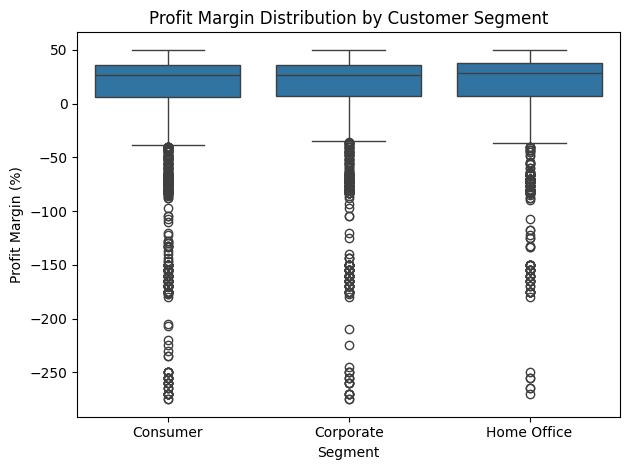


### Summary & Business Insights

The box plot titled **"Profit Margin Distribution by Customer Segment"** provides a comparative view of profit margins across three segments: **Consumer**, **Corporate**, and **Home Office**.

---

#### **Summary:**

- **Segment Similarity:**
  - The distributions for all three segments are highly similar, suggesting that the business's profitability is not heavily dependent on the customer type.
  - The median profit margin is positive for all, and the interquartile range (IQR) is consistently narrow, indicating that most transactions generate a stable, positive margin.

- **Extreme Losses (Outliers):**
  - All segments show a significant number of transactions with extremely negative profit margins, represented by a large number of outliers extending far below zero.
  - Losses in the **Corporate** and **Home Office** segments are the most severe, with some outliers reaching approximately **-250%** profit margin.

---

#### **Business Insights:**

1.  **Systemic Profitability Challenges:**
    - The fact that all segments exhibit similar patterns of profitability and extreme losses points to a **systemic, company-wide issue** rather than a problem specific to a single customer type.
    - **Action Needed:** The business should conduct a holistic review of its operations, including pricing, discount policies, and cost structures, to identify the root causes of the severe losses.

2.  **Addressing Severe Negative Margins:**
    - The transactions with profit margins well below -100% are particularly alarming, as they indicate that the losses are not just from discounting but also from other factors like shipping, returns, or operational costs.
    - **Action Needed:** A deep-dive analysis is needed on these specific transactions to uncover the combination of factors that leads to such extreme unprofitability. This data should inform new policies to prevent similar losses in the future.

3.  **Harnessing High-Margin Potential:**
    - All segments have a similar potential for high-profit transactions, with margins reaching up to 50%.
    - **Action Needed:** The business should analyze what makes these transactions so successful. By replicating these conditions (e.g., successful product bundles, sales channels), the company can increase its overall median profitability.

4.  **Uniform Strategic Approach:**
    - Given the consistent performance across segments, the business can implement a **unified strategy** to improve profitability.
    - **Action Needed:** A single, refined approach to discount management, cost control, and sales incentives that is applied across all customer segments would likely be more efficient and effective than developing separate strategies for each.

In summary, the data reveals that the business's profitability challenges are not customer-specific but are a broad, structural issue. The key to improvement lies in implementing a comprehensive, company-wide strategy to mitigate extreme losses and leverage existing high-margin opportunities.


In [22]:
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) * 100

sns.boxplot(x='Segment', y='Profit Margin (%)', data=df)
plt.title("Profit Margin Distribution by Customer Segment")
plt.tight_layout()
plt.show()


from IPython.display import Markdown

summary_text = """
### Summary & Business Insights

The box plot titled **"Profit Margin Distribution by Customer Segment"** provides a comparative view of profit margins across three segments: **Consumer**, **Corporate**, and **Home Office**.

---

#### **Summary:**

- **Segment Similarity:**
  - The distributions for all three segments are highly similar, suggesting that the business's profitability is not heavily dependent on the customer type.
  - The median profit margin is positive for all, and the interquartile range (IQR) is consistently narrow, indicating that most transactions generate a stable, positive margin.

- **Extreme Losses (Outliers):**
  - All segments show a significant number of transactions with extremely negative profit margins, represented by a large number of outliers extending far below zero.
  - Losses in the **Corporate** and **Home Office** segments are the most severe, with some outliers reaching approximately **-250%** profit margin.

---

#### **Business Insights:**

1.  **Systemic Profitability Challenges:**
    - The fact that all segments exhibit similar patterns of profitability and extreme losses points to a **systemic, company-wide issue** rather than a problem specific to a single customer type.
    - **Action Needed:** The business should conduct a holistic review of its operations, including pricing, discount policies, and cost structures, to identify the root causes of the severe losses.

2.  **Addressing Severe Negative Margins:**
    - The transactions with profit margins well below -100% are particularly alarming, as they indicate that the losses are not just from discounting but also from other factors like shipping, returns, or operational costs.
    - **Action Needed:** A deep-dive analysis is needed on these specific transactions to uncover the combination of factors that leads to such extreme unprofitability. This data should inform new policies to prevent similar losses in the future.

3.  **Harnessing High-Margin Potential:**
    - All segments have a similar potential for high-profit transactions, with margins reaching up to 50%.
    - **Action Needed:** The business should analyze what makes these transactions so successful. By replicating these conditions (e.g., successful product bundles, sales channels), the company can increase its overall median profitability.

4.  **Uniform Strategic Approach:**
    - Given the consistent performance across segments, the business can implement a **unified strategy** to improve profitability.
    - **Action Needed:** A single, refined approach to discount management, cost control, and sales incentives that is applied across all customer segments would likely be more efficient and effective than developing separate strategies for each.

In summary, the data reveals that the business's profitability challenges are not customer-specific but are a broad, structural issue. The key to improvement lies in implementing a comprehensive, company-wide strategy to mitigate extreme losses and leverage existing high-margin opportunities.
"""

display(Markdown(summary_text))

# Average Delivery Time Analysis 

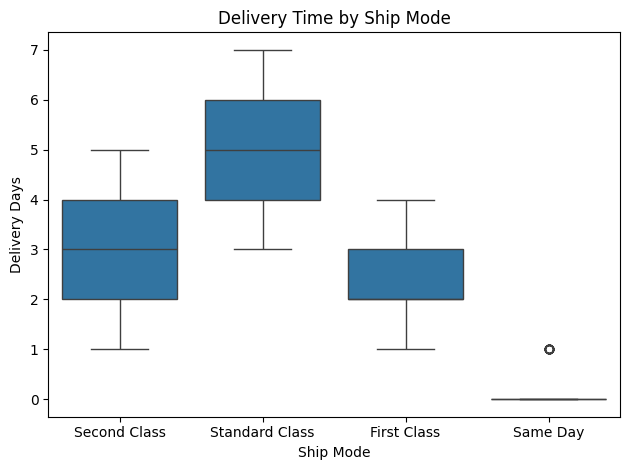


### Summary & Business Insights

The box plot titled **"Delivery Time by Ship Mode"** analyzes the distribution of delivery times (in days) across four shipping modes: **Second Class**, **Standard Class**, **First Class**, and **Same Day**.

---

#### **Summary:**

- **Same Day Shipping:**
  - This is the fastest and most consistent mode, with a median delivery time of **0 days**. The distribution is very tight, with minimal variability.
  
- **First Class Shipping:**
  - The median delivery time is approximately **2.5 days**, making it the second fastest. It has a narrow interquartile range (IQR), indicating high reliability.
  
- **Second Class Shipping:**
  - This mode is slightly slower than First Class, with a median of about **3 days**. Its wider distribution suggests less consistency in delivery times.

- **Standard Class Shipping:**
  - This is the slowest and least reliable mode, with a median delivery time of **5 days** and the broadest delivery range, extending up to **7 days**.

---

#### **Business Insights:**

1.  **Reliability is a Competitive Advantage:**
    - The business has a strong track record of fast, reliable delivery for its expedited shipping options ("Same Day" and "First Class"). This is a key asset that can be used to attract and retain customers.
    - **Action Needed:** Use the reliability of expedited shipping as a core marketing message to encourage customers to choose these options, which can also increase revenue.

2.  **Improving Standard Class Service:**
    - The high variability and slow median delivery time of Standard Class could lead to customer dissatisfaction and a loss of market share to competitors with more efficient basic shipping.
    - **Action Needed:**
      - **Root Cause Analysis:** Investigate the logistics and operational processes for Standard Class to pinpoint and address bottlenecks.
      - **Target Improvement:** Focus on reducing the median delivery time and, more critically, narrowing the delivery time range to improve consistency.

3.  **Potential for "Same Day" Expansion:**
    - The proven efficiency of the Same Day service model is a valuable asset.
    - **Action Needed:** Evaluate the feasibility of expanding the "Same Day" service to new geographic areas or for a wider selection of products, where it is logistically and financially sound.

4.  **Aligning Price with Performance:**
    - The clear hierarchy of delivery speed and reliability should be reflected in the pricing of each shipping mode.
    - **Action Needed:** Review the current pricing structure for all shipping options to ensure that the premium for faster, more reliable service is justified and incentivizes customers to choose these options.

In summary, the business is highly effective at its premium shipping services, but the "Standard Class" mode presents an opportunity for improvement. By leveraging its strengths and addressing its weaknesses, the company can enhance its customer experience and competitive position.


In [23]:
df['Delivery Days'] = (df['Ship Date'] - df['Order Date']).dt.days

sns.boxplot(x='Ship Mode', y='Delivery Days', data=df)
plt.title("Delivery Time by Ship Mode")
plt.tight_layout()
plt.show()


from IPython.display import Markdown

summary_text = """
### Summary & Business Insights

The box plot titled **"Delivery Time by Ship Mode"** analyzes the distribution of delivery times (in days) across four shipping modes: **Second Class**, **Standard Class**, **First Class**, and **Same Day**.

---

#### **Summary:**

- **Same Day Shipping:**
  - This is the fastest and most consistent mode, with a median delivery time of **0 days**. The distribution is very tight, with minimal variability.
  
- **First Class Shipping:**
  - The median delivery time is approximately **2.5 days**, making it the second fastest. It has a narrow interquartile range (IQR), indicating high reliability.
  
- **Second Class Shipping:**
  - This mode is slightly slower than First Class, with a median of about **3 days**. Its wider distribution suggests less consistency in delivery times.

- **Standard Class Shipping:**
  - This is the slowest and least reliable mode, with a median delivery time of **5 days** and the broadest delivery range, extending up to **7 days**.

---

#### **Business Insights:**

1.  **Reliability is a Competitive Advantage:**
    - The business has a strong track record of fast, reliable delivery for its expedited shipping options ("Same Day" and "First Class"). This is a key asset that can be used to attract and retain customers.
    - **Action Needed:** Use the reliability of expedited shipping as a core marketing message to encourage customers to choose these options, which can also increase revenue.

2.  **Improving Standard Class Service:**
    - The high variability and slow median delivery time of Standard Class could lead to customer dissatisfaction and a loss of market share to competitors with more efficient basic shipping.
    - **Action Needed:**
      - **Root Cause Analysis:** Investigate the logistics and operational processes for Standard Class to pinpoint and address bottlenecks.
      - **Target Improvement:** Focus on reducing the median delivery time and, more critically, narrowing the delivery time range to improve consistency.

3.  **Potential for "Same Day" Expansion:**
    - The proven efficiency of the Same Day service model is a valuable asset.
    - **Action Needed:** Evaluate the feasibility of expanding the "Same Day" service to new geographic areas or for a wider selection of products, where it is logistically and financially sound.

4.  **Aligning Price with Performance:**
    - The clear hierarchy of delivery speed and reliability should be reflected in the pricing of each shipping mode.
    - **Action Needed:** Review the current pricing structure for all shipping options to ensure that the premium for faster, more reliable service is justified and incentivizes customers to choose these options.

In summary, the business is highly effective at its premium shipping services, but the "Standard Class" mode presents an opportunity for improvement. By leveraging its strengths and addressing its weaknesses, the company can enhance its customer experience and competitive position.
"""

display(Markdown(summary_text))

# Order Processing Time vs Sales

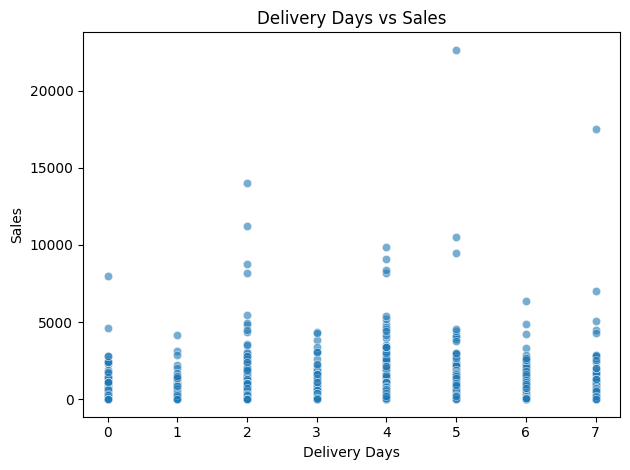


### Summary & Business Insights

The scatter plot titled **"Delivery Days vs Sales"** visualizes the relationship between the number of delivery days and the sales value for individual transactions.

---

#### **Summary:**

- **Sales Distribution:**
  - The majority of transactions, regardless of delivery time, are for sales of less than **$5,000**.
  - High-value sales are scattered across all delivery times, with notable outliers reaching over **$10,000** for delivery days 0, 2, 5, and 7. The highest sale, exceeding **$22,500**, occurred with a 5-day delivery time.

- **Correlation:**
  - There is **no apparent correlation** between delivery speed and the sales value of a transaction. High-value purchases do not seem to be exclusively tied to faster shipping options.

---

#### **Business Insights:**

1.  **Delivery Speed is Not the Sole Driver of Sales Value:**
    - This lack of correlation challenges the assumption that fast delivery is the only factor for securing high-value sales. It suggests that other factors, such as product uniqueness or quality, are more influential.
    - **Action Needed:** Focus on providing a reliable customer experience across all delivery tiers rather than assuming that all high-value customers demand the fastest shipping.

2.  **Ensure Consistency in All Shipping Tiers:**
    - Since high-value transactions are occurring with longer delivery times, the business must ensure that its standard shipping options are reliable and meet customer expectations.
    - **Action Needed:** Investigate and improve the consistency and predictability of standard shipping services to cater to all customer segments, including those making large purchases who may be prioritizing other factors over speed.

3.  **Investigate High-Value Outliers:**
    - The transactions with exceptionally high sales values, especially those with longer delivery times, warrant further analysis.
    - **Action Needed:** Conduct a deep dive into what was purchased and the customer demographics for these transactions. This can provide valuable insights into what drives a customer to make a large purchase even when not selecting the fastest delivery option.

4.  **Strategic Upselling of Fast Delivery:**
    - While fast delivery doesn't guarantee a high-value sale, it remains a premium service.
    - **Action Needed:** Continue to offer faster shipping as an upsell option. The business can strategically market its reliable expedited shipping to customers who prioritize speed, while maintaining a strong, reliable standard service for the majority of transactions.

In summary, the data demonstrates that a customer's willingness to make a large purchase is not directly dependent on fast delivery. The business should therefore focus on providing a consistently reliable service across all delivery modes and use fast shipping as a strategic, premium offering.


In [24]:
sns.scatterplot(data=df, x='Delivery Days', y='Sales', alpha=0.6)
plt.title("Delivery Days vs Sales")
plt.tight_layout()
plt.show()

from IPython.display import Markdown

summary_text = """
### Summary & Business Insights

The scatter plot titled **"Delivery Days vs Sales"** visualizes the relationship between the number of delivery days and the sales value for individual transactions.

---

#### **Summary:**

- **Sales Distribution:**
  - The majority of transactions, regardless of delivery time, are for sales of less than **$5,000**.
  - High-value sales are scattered across all delivery times, with notable outliers reaching over **$10,000** for delivery days 0, 2, 5, and 7. The highest sale, exceeding **$22,500**, occurred with a 5-day delivery time.

- **Correlation:**
  - There is **no apparent correlation** between delivery speed and the sales value of a transaction. High-value purchases do not seem to be exclusively tied to faster shipping options.

---

#### **Business Insights:**

1.  **Delivery Speed is Not the Sole Driver of Sales Value:**
    - This lack of correlation challenges the assumption that fast delivery is the only factor for securing high-value sales. It suggests that other factors, such as product uniqueness or quality, are more influential.
    - **Action Needed:** Focus on providing a reliable customer experience across all delivery tiers rather than assuming that all high-value customers demand the fastest shipping.

2.  **Ensure Consistency in All Shipping Tiers:**
    - Since high-value transactions are occurring with longer delivery times, the business must ensure that its standard shipping options are reliable and meet customer expectations.
    - **Action Needed:** Investigate and improve the consistency and predictability of standard shipping services to cater to all customer segments, including those making large purchases who may be prioritizing other factors over speed.

3.  **Investigate High-Value Outliers:**
    - The transactions with exceptionally high sales values, especially those with longer delivery times, warrant further analysis.
    - **Action Needed:** Conduct a deep dive into what was purchased and the customer demographics for these transactions. This can provide valuable insights into what drives a customer to make a large purchase even when not selecting the fastest delivery option.

4.  **Strategic Upselling of Fast Delivery:**
    - While fast delivery doesn't guarantee a high-value sale, it remains a premium service.
    - **Action Needed:** Continue to offer faster shipping as an upsell option. The business can strategically market its reliable expedited shipping to customers who prioritize speed, while maintaining a strong, reliable standard service for the majority of transactions.

In summary, the data demonstrates that a customer's willingness to make a large purchase is not directly dependent on fast delivery. The business should therefore focus on providing a consistently reliable service across all delivery modes and use fast shipping as a strategic, premium offering.
"""

display(Markdown(summary_text))